<a href="https://colab.research.google.com/github/MohamedWael45/RFM/blob/main/RFM_VeryFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import random
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
url="https://raw.githubusercontent.com/MohamedWael45/RFM/main/RFMwithExcel.xlsx"
df=pd.read_excel(url)

In [24]:
df2 = pd.read_excel(url, sheet_name="Customer RFM Analysis")
df2.head()

,NOTE - The original Recency calculation was incorrect. This worksheet has the corrected calculation.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CustomerID,MostRecentOrderDate,DaysSinceLastOrder,SalesOrderCount,TotalSalesAmount,Recency,Frequency,Monetary
2,11000,2013-05-03 00:00:00,288,3,8248.99,2,9,9
3,11001,2013-12-10 00:00:00,67,3,6383.88,8,9,9
4,11002,2013-02-23 00:00:00,357,3,8114.04,0,9,9


In [40]:
new_column_names = [
    "CustomerID", "MostRecentOrderDate", "DaysSinceLastOrder",
    "SalesOrderCount", "TotalSalesAmount", "Recency", "Frequency", "Monetary"]
df2.columns = new_column_names
df2.head()
df2 = df2.drop(df2.index[0])
print(df2)

      CustomerID  MostRecentOrderDate  DaysSinceLastOrder SalesOrderCount  \
2          11000  2013-05-03 00:00:00               288.0               3   
3          11001  2013-12-10 00:00:00                67.0               3   
4          11002  2013-02-23 00:00:00               357.0               3   
5          11003  2013-05-10 00:00:00               281.0               3   
7          11005  2013-05-02 00:00:00               289.0               3   
...          ...                  ...                 ...             ...   
18481      29479  2012-09-04 00:00:00               529.0               1   
18482      29480  2013-07-17 00:00:00               213.0               1   
18483      29481  2011-08-13 00:00:00               917.0               1   
18484      29482  2012-09-18 00:00:00               515.0               1   
18485      29483  2012-09-09 00:00:00               524.0               1   

      TotalSalesAmount Recency Frequency Monetary  
2              8248.99 

In [41]:
df2['DaysSinceLastOrder'] = pd.to_numeric(df2['DaysSinceLastOrder'], errors='coerce')
df2['TotalSalesAmount'] = df2['TotalSalesAmount'].apply(lambda x: int(round(x)))
try:
  df2['SalesOrderCount'] = pd.to_numeric(df2['SalesOrderCount'], errors='coerce')
except ValueError:
  print("Warning: 'SalesOrderCount' column contains non-numeric values and cannot be converted to int.")
df2['Recency'] = pd.to_numeric(df2['Recency'], errors='coerce')
df2['Frequency'] = pd.to_numeric(df2['Frequency'], errors='coerce')
df2['Monetary'] = pd.to_numeric(df2['Monetary'], errors='coerce')
print(df2.dtypes)

CustomerID              object
MostRecentOrderDate     object
DaysSinceLastOrder     float64
SalesOrderCount          int64
TotalSalesAmount         int64
Recency                  int64
Frequency                int64
Monetary                 int64
dtype: object


In [42]:
df2.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=True, inplace=True)
print(df2)

     CustomerID  MostRecentOrderDate  DaysSinceLastOrder  SalesOrderCount  \
1516      12514  2013-02-14 00:00:00               366.0                1   
1726      12724  2013-02-01 00:00:00               379.0                1   
1839      12837  2013-02-10 00:00:00               370.0                1   
1908      12906  2013-02-16 00:00:00               364.0                1   
2277      13275  2013-02-10 00:00:00               370.0                1   
...         ...                  ...                 ...              ...   
4662      15660  2013-12-25 00:00:00                52.0                3   
4689      15687  2013-12-26 00:00:00                51.0                3   
7143      18141  2013-12-16 00:00:00                61.0                3   
7149      18147  2013-12-19 00:00:00                58.0                3   
7170      18168  2013-12-18 00:00:00                59.0                3   

      TotalSalesAmount  Recency  Frequency  Monetary  
1516                

In [43]:
def min_max_normalization(column):
    min_val = column.min()
    max_val = column.max()
    normalized_values = (column - min_val) / (max_val - min_val)
    return normalized_values

# Apply min-max normalization to the columns 'Recency', 'Frequency', and 'Monetary'
df2['Recency_normalized'] = min_max_normalization(df2['Recency'])
df2['Frequency_normalized'] = min_max_normalization(df2['Frequency'])
df2['Monetary_normalized'] = min_max_normalization(df2['Monetary'])


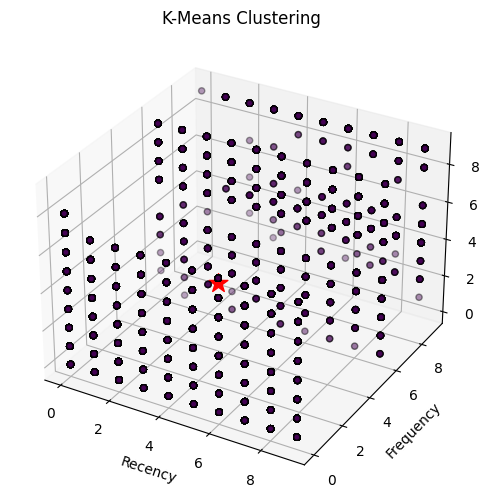

Cluster name: High recency, low frequency, low monetary
Number of data points: 18483
Number of clusters: 1
Number of iterations: 2


"ax = fig.add_subplot(111, projection='3d')\nax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')\n\nax.set_xlabel('Recency')\nax.set_ylabel('Frequency')\nax.set_zlabel('Monetary')\nplt.title('K-Means Clustering')\nplt.show()"

In [60]:
X = df2[['Recency', 'Frequency', 'Monetary']]
initial_centroids = np.array([0, 5, 4]).reshape(1, -1)
kmeans = KMeans(n_clusters=1, init=initial_centroids, n_init=1, max_iter=10, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='*', s=200)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()

# Naming the cluster based on its characteristics
cluster_name = "High recency, low frequency, low monetary"


# Printing the cluster name and the number of data points in it
print(f"Cluster name: {cluster_name}")
print(f"Number of data points: {len(labels)}")
print(f"Number of clusters: {kmeans.n_clusters}")
print(f"Number of iterations: {kmeans.n_iter_}")

'''ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()'''

Number of clusters: 10


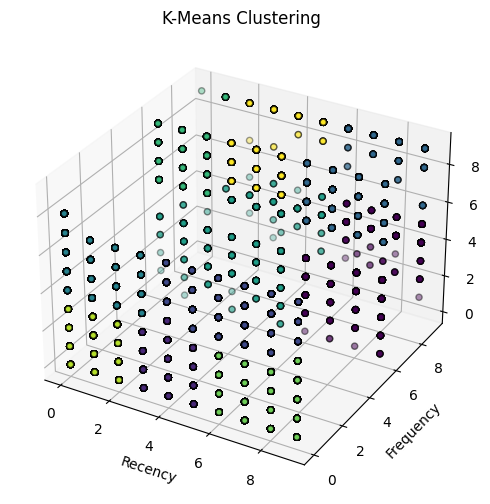

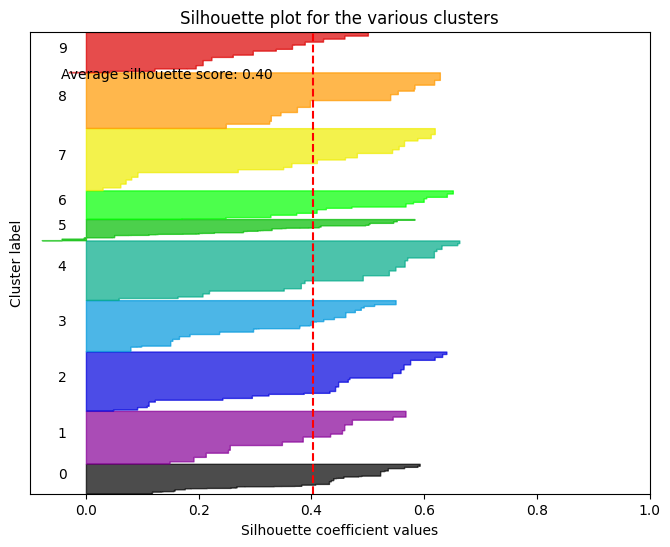

In [70]:
# Creating the KMeans model with 10 clusters and 'k-means++' initialization
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=10, random_state=42)
# Creating an array of shape (10, 3) with some random values for the initial centroids
initial_centroids = np.array([[0, 5, 4], [1, 6, 3], [2, 7, 2], [3, 8, 1], [4, 9, 0], [5, 4, 5], [6, 3, 6], [7, 2, 7], [8, 1, 8], [9, 0, 9]])

# Creating the KMeans model with 10 clusters and the custom array as the initial centroids
kmeans = KMeans(n_clusters=10, init=initial_centroids, n_init=1, max_iter=10, random_state=42)


# Printing the number of clusters, iterations, and silhouette score
print(f"Number of clusters: {kmeans.n_clusters}")


# Creating a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')


ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()
#likkkeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee

from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)

# Creating a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Setting the x-axis limits
ax.set_xlim([-0.1, 1])

# Setting the y-axis limits
ax.set_ylim([0, len(X) + (10 + 1) * 10])

# Plotting the silhouette scores for each data point
y_lower = 10
for i in range(10):
    # Selecting the silhouette scores for the ith cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

    # Sorting the silhouette scores in descending order
    ith_cluster_silhouette_values.sort()

    # Calculating the size of the ith cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    # Defining the y-axis position for the ith cluster
    y_upper = y_lower + size_cluster_i

    # Choosing a color for the ith cluster
    color = plt.cm.nipy_spectral(float(i) / 10)

    # Filling the area with the silhouette scores for the ith cluster
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Labeling the silhouette plot with the cluster number
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Updating the y_lower for the next cluster
    y_lower = y_upper + 10

# Labeling the silhouette plot with the average silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.text(0.05, 0.9, 'Average silhouette score: {:.2f}'.format(silhouette_avg),
        transform=ax.transAxes)

# Setting the x-axis label
ax.set_xlabel("Silhouette coefficient values")

# Setting the y-axis label
ax.set_ylabel("Cluster label")

# Removing the y-axis ticks
ax.set_yticks([])

# Setting the title
ax.set_title("Silhouette plot for the various clusters")

# Showing the plot
plt.show()

Cluster labels: [0 0 0 ... 2 2 2]


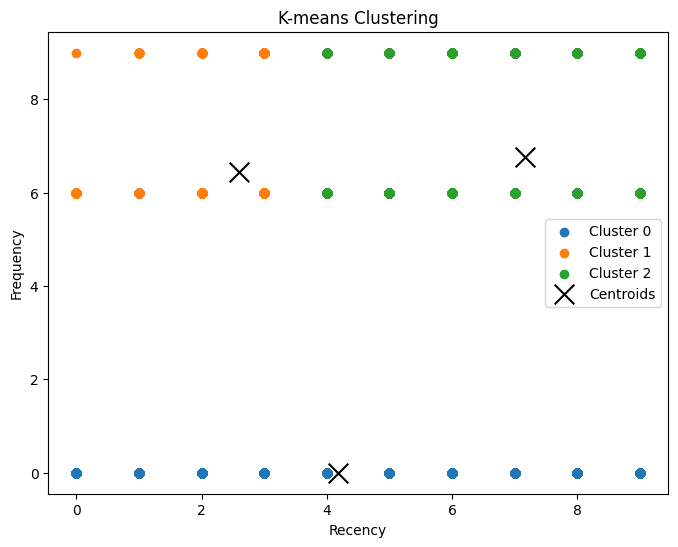

In [66]:

median_R2 = df2['Recency'].median()
median_F2 = df2['Frequency'].median()
median_M2 = df2['Monetary'].median()

# Create initial centroids as the medians of each column
initial_centroids = np.array([[median_R2, median_F2, median_M2]])

# Define the number of clusters (k)
k = 3  # Change this to the desired number of segments

# Repeat median calculation k-1 times to get k initial centroids
for _ in range(k-1):
    median_R2 = df2['Recency'].median()
    median_F2 = df2['Frequency'].median()
    median_M2 = df2['Monetary'].median()
    initial_centroids = np.append(initial_centroids, [[median_R2, median_F2, median_M2]], axis=0)

# Perform K-means clustering with the initial centroids
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1)
kmeans.fit(df2[['Recency', 'Frequency', 'Monetary']])

# Print the cluster labels
print("Cluster labels:", kmeans.labels_)


df2['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in df2['Cluster'].unique():
    plt.scatter(df2[df2['Cluster'] == cluster]['Recency'],
                df2[df2['Cluster'] == cluster]['Frequency'],
                label=f'Cluster {cluster}')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('K-means Clustering')
plt.legend()
plt.show()

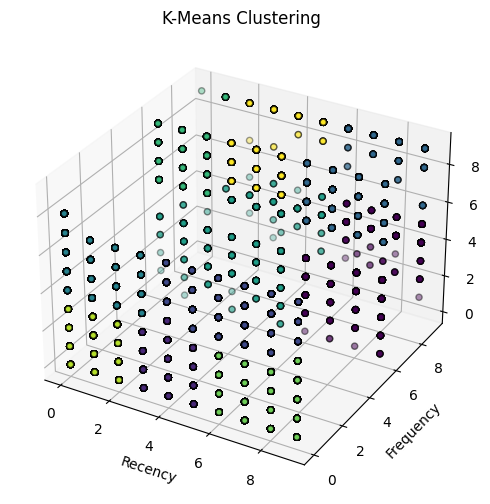

In [67]:
X = df2[['Recency', 'Frequency', 'Monetary']]
initial_centroids = X.median().values.reshape(1, -1)
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, max_iter=4, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Recency'], X['Frequency'], X['Monetary'], c=labels.astype(np.float64), edgecolor='k')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('K-Means Clustering')
plt.show()
